In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt 
from tensorflow import keras 
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


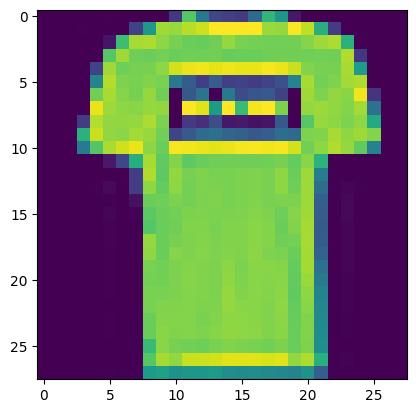

In [3]:
plt.imshow(x_train[1])

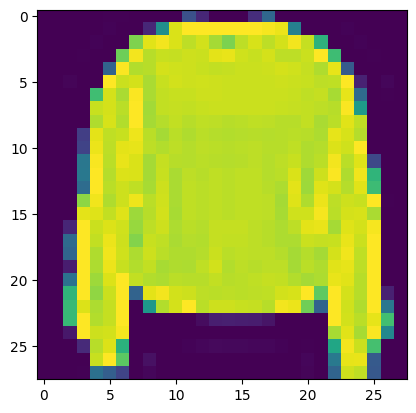

In [9]:
plt.imshow(x_train[7])

In [10]:
x_train = x_train.astype('float32') / 255.0 
x_test = x_test.astype('float32') / 255.0

x_train = x_train.reshape(-1, 28, 28, 1) 
x_test = x_test.reshape(-1, 28, 28, 1)

In [14]:
x_train.shape

(60000, 28, 28, 1)

In [15]:
x_test.shape 

(10000, 28, 28, 1)

In [16]:
y_train.shape 

(60000,)

In [17]:
y_test.shape

(10000,)

In [18]:
model = keras.Sequential([keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),keras.layers.MaxPooling2D((2,2)),keras.layers.Dropout(0.25),keras.layers.Conv2D(64, (3,3), activation='relu'),keras.layers.MaxPooling2D((2,2)),keras.layers.Dropout(0.25),keras.layers.Conv2D(128, (3,3), activation='relu'),keras.layers.Flatten(),keras.layers.Dense(128, activation='relu'),keras.layers.Dropout(0.25),keras.layers.Dense(10, activation='softmax')])


In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

In [20]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 85s 45ms/step - loss: 0.5817 - accuracy: 0.7810 - val_loss: 0.4005 - val_accuracy: 0.8527
Epoch 2/10
1875/1875 [==============================] - 82s 44ms/step - loss: 0.3875 - accuracy: 0.8582 - val_loss: 0.3255 - val_accuracy: 0.8817
Epoch 3/10
1875/1875 [==============================] - 83s 44ms/step - loss: 0.3326 - accuracy: 0.8775 - val_loss: 0.2970 - val_accuracy: 0.8907
Epoch 4/10
1875/1875 [==============================] - 83s 44ms/step - loss: 0.3043 - accuracy: 0.8875 - val_loss: 0.2905 - val_accuracy: 0.8915
Epoch 5/10
1875/1875 [==============================] - 81s 43ms/step - loss: 0.2845 - accuracy: 0.8951 - val_loss: 0.2649 - val_accuracy: 0.9015
Epoch 6/10
1875/1875 [==============================] - 82s 43ms/step - loss: 0.2690 - accuracy: 0.9004 - val_loss: 0.2610 - val_accuracy: 0.9014
Epoch 7/10
1875/1875 [==============================] - 80s 43ms/step - loss: 0.2574 - accuracy: 0.9028 - val_loss: 0.2659 -

In [21]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 4s 11ms/step - loss: 0.2534 - accuracy: 0.9097


In [22]:
print('Test accuracy:', test_acc)

Test accuracy: 0.9096999764442444
